In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [3]:
testing_sites_df =  pd.read_csv('https://raw.githubusercontent.com/dcrago/Team50_Project/main/COVID-19%20Testing%20Locations%20Symbolized%20by%20Test%20Type.csv?token=AQNOFLNRUEKL6M4MRQH5I7S776SKG')

In [4]:
testing_sites_df.drop(columns = ['Owner Name','Phone','Website','Operational Hours','Vehicle Capacity','CreationDate','Drive-through','Appointment Only','Referral Required','Call first','Virtual/Telehealth Screening','Local Health Department URL','Vehicle Required','Offering same-day diagnostic (not antibody) results','Offering Take-Home Test','Status Color'], inplace = True)
testing_sites_df.drop(columns = ['Public Form Submission','Minimum Age','Wheelchair accessibility ','Accessibility Support'], inplace = True)

In [5]:

testing_sites_df['county']= testing_sites_df['County']
testing_sites_df
testing_sites_df.sort_values(by ='County')


,Name of Facility,Full Address,Municipality,Owner Type,Daily Testing Capacity,Services Offered,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y,county
8858,CHC Enfield,"5 North Main Street, Enfield, CT",Enfield,FQHC,NaN,COVID-19 testing only (no screening),Connecticut,Hartford,11/3/2020,11/3/2020,Molecular,Not Specified,Mobile/Pop-up (short-term event),-8.082311e+06,5160794.778,Hartford
6809,ALBERTSONS 184,"6560 SOUTH FEDERAL WAY, Boise ID, 83716",Boise,Private,NaN,COVID-19 screening and testing,Idaho,Ada,8/16/2020,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.293014e+07,5394986.099,Ada
4850,Family Medicine Health Center-Kuna,"708 E Wythe Creek Ct Ste 103, Kuna, ID 83634-5005",Kuna,FQHC,NaN,COVID-19 screening and testing,Idaho,Ada,NaN,NaN,Molecular,Offsite Lab,Clinic/Health Center,-1.295815e+07,5386506.524,Ada
6802,ALBERTSONS 169,"909 EAST PARKCENTER BLVD, Boise ID, 83706",Boise,Private,NaN,COVID-19 screening and testing,Idaho,Ada,8/16/2020,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.293219e+07,5401123.670,Ada
3895,Rite Aid/Project Baseline Testing Site,"3250 S Eagle Road Meridian, ID",Meridian,Public-Private Partnership,NaN,COVID-19 screening and testing,Idaho,Ada,NaN,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.295245e+07,5399916.908,Ada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10788,CIC Health Middlebury,"154 Creek Rd, Middlebury, VT 05753, USA",Middlebury,Public-Private Partnership,NaN,COVID-19 testing only (no screening),Vermont,NaN,NaN,NaN,Molecular,Offsite Lab,Indoor Non-medical Facility,-8.144216e+06,5465912.348,NaN
10789,CIC Health Brattleboro,"17 Belmont Ave, Brattleboro, VT 05301, USA",Brattleboro,Public-Private Partnership,NaN,COVID-19 testing only (no screening),Vermont,NaN,NaN,NaN,Molecular,Offsite Lab,Indoor Non-medical Facility,-8.077923e+06,5288098.494,NaN
10790,CIC Health Newton,"Riverside MBTA Station Parking Lot, 367 Grove ...",Newton,Public-Private Partnership,NaN,COVID-19 testing only (no screening),Massachusetts,NaN,NaN,NaN,Molecular,Offsite Lab,Indoor Non-medical Facility,-7.931803e+06,5211651.232,NaN
10791,CIC Health Cambridge,"Ground Floor, 245 Main St, Cambridge, MA 02142...",Cambridge,Public-Private Partnership,NaN,COVID-19 testing only (no screening),Massachusetts,NaN,NaN,NaN,Molecular,Offsite Lab,Indoor Non-medical Facility,-7.913119e+06,5215443.009,NaN


In [15]:
testing_sites_df['county_states']= testing_sites_df['county'] + ' , ' + testing_sites_df['State or Territory']
testing_sites_df

,Name of Facility,Full Address,Municipality,Owner Type,Daily Testing Capacity,Services Offered,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y,county,county_states
0,Wheeling Hospital/WVU Hospitals Offsite COVID-...,"Wheeling Park (Near Ice Rink), 1801 National R...",Wheeling,Municipal,NaN,COVID-19 testing only (no screening),West Virginia,Ohio,NaN,NaN,Molecular,Lab (location not specified),Hospital,-8.979782e+06,4874576.993,Ohio,"Ohio , West Virginia"
1,Middleton Family Medicine,"147 South Main Street Middleton, MA 01949",Middleton,Other,NaN,COVID-19 testing only (no screening),Massachusetts,Essex,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-7.904520e+06,5248669.198,Essex,"Essex , Massachusetts"
2,Central Outreach Wellness Center,"127 Anderson Street, Suite 101 Timber Court Bu...",Pittsburgh,Nonprofit,NaN,COVID-19 screening and testing,Pennsylvania,Allegheny,NaN,NaN,Molecular,Lab (location not specified),Outdoor/Tent,-8.905650e+06,4931349.163,Allegheny,"Allegheny , Pennsylvania"
3,Anthony Wayne Recreation Area,"Palisades Int Interstate Parkway, Exit 17, Bea...",Bear Mountain,State/Territory,NaN,COVID-19 testing only (no screening),New York,Orange,NaN,NaN,Molecular,Lab (location not specified),NaN,-8.240723e+06,5056547.051,Orange,"Orange , New York"
4,Wexford Health + Wellness Pavilion (Allegheny ...,"12311 Perry Highway Wexford, PA 15090",Wexford,Private,NaN,COVID-19 testing only (no screening),Pennsylvania,Allegheny,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-8.912678e+06,4958745.420,Allegheny,"Allegheny , Pennsylvania"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,Kahoka Christian Church,"MO-81, Kahoka, MO 63445",Kahoka,State/Territory,NaN,COVID-19 testing only (no screening),Missouri,Clark,12/7/2020,12/7/2020,Molecular,Offsite Lab,Mobile/Pop-up (short-term event),-1.021017e+07,4927212.539,Clark,"Clark , Missouri"
10800,Marshall County Health Department,"513 6th Street Moundsville, WV 26041",Moundsville,Municipal,NaN,COVID-19 testing only (no screening),West Virginia,Marshall,12/14/2020,12/18/2020,Molecular,Offsite Lab,Mobile/Pop-up (short-term event),-8.988640e+06,4854205.481,Marshall,"Marshall , West Virginia"
10801,Premier Urgent Care,"1301 East 47th Street, Chicago, Il 60653",Chicago,Public-Private Partnership,30.0,COVID-19 screening and testing,Illinois,Cook,10/1/2020,3/31/2021,"Molecular, Antibody, and Antigen",More than one processing location,Urgent Care,-9.751765e+06,5132563.259,Cook,"Cook , Illinois"
10802,The Word Church,"18909 South Miles Road Warrensville Heights, O...",Cleveland,State/Territory,NaN,COVID-19 testing only (no screening),Ohio,Cuyahoga,12/13/2020,12/13/2020,Molecular,Offsite Lab,Medical Center,-9.077688e+06,5076056.620,Cuyahoga,"Cuyahoga , Ohio"


In [16]:
testing_sites_df.groupby

<bound method DataFrame.groupby of                                         Name of Facility  \
0      Wheeling Hospital/WVU Hospitals Offsite COVID-...   
1                              Middleton Family Medicine   
2                       Central Outreach Wellness Center   
3                          Anthony Wayne Recreation Area   
4      Wexford Health + Wellness Pavilion (Allegheny ...   
...                                                  ...   
10799                            Kahoka Christian Church   
10800                  Marshall County Health Department   
10801                                Premier Urgent Care   
10802                                    The Word Church   
10803                             Cherryland Center Mall   

                                            Full Address   Municipality  \
0      Wheeling Park (Near Ice Rink), 1801 National R...       Wheeling   
1              147 South Main Street Middleton, MA 01949      Middleton   
2      127 Anderson

In [17]:
#WE STOPPED HERE... We want to see the number of testing sites per county 
#so we can correlate the number of testing sites by county to covid mortality
#and create a fig out of that 
testing_sites_df['county_states'].dropna()

0             Ohio , West Virginia
1            Essex , Massachusetts
2         Allegheny , Pennsylvania
3                Orange , New York
4         Allegheny , Pennsylvania
                   ...            
10799             Clark , Missouri
10800     Marshall , West Virginia
10801              Cook , Illinois
10802              Cuyahoga , Ohio
10803    Grand Traverse , Michigan
Name: county_states, Length: 10226, dtype: object

In [18]:
pd.unique(testing_sites_df['county_states'])

array(['Ohio , West Virginia', 'Essex , Massachusetts',
       'Allegheny , Pennsylvania', ..., 'Paulding , Ohio',
       'Putnam , Ohio', 'Clark , Missouri'], dtype=object)

In [19]:
Covid_data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [20]:
asthma = pd.read_csv('500_Cities__Current_asthma_among_adults_aged___18_years.csv')

In [21]:
Covid_data['mortality'] = Covid_data['deaths']/Covid_data['cases']
Covid_data.tail()

,date,county,state,fips,cases,deaths,mortality
923757,2021-01-12,Sweetwater,Wyoming,56037.0,3210,26.0,0.008100
923758,2021-01-12,Teton,Wyoming,56039.0,2497,4.0,0.001602
923759,2021-01-12,Uinta,Wyoming,56041.0,1764,9.0,0.005102
923760,2021-01-12,Washakie,Wyoming,56043.0,824,23.0,0.027913
923761,2021-01-12,Weston,Wyoming,56045.0,601,4.0,0.006656


In [22]:
df2 = testing_sites_df.groupby('county').count()['County']

In [23]:


testing_sites_covid = Covid_data.merge(df2,
    how='inner',
    on = 'county'
)

testing_sites_covid

,date,county,state,fips,cases,deaths,mortality,County
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,0.0,57
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,0.0,57
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,0.0,57
3,2020-01-24,Snohomish,Washington,53061.0,1,0.0,0.0,57
4,2020-01-25,Snohomish,Washington,53061.0,1,0.0,0.0,57
...,...,...,...,...,...,...,...,...
506659,2021-01-08,Hayes,Nebraska,31085.0,55,0.0,0.0,2
506660,2021-01-09,Hayes,Nebraska,31085.0,55,0.0,0.0,2
506661,2021-01-10,Hayes,Nebraska,31085.0,55,0.0,0.0,2
506662,2021-01-11,Hayes,Nebraska,31085.0,55,0.0,0.0,2


In [24]:
testing_sites_covid.corr()['County']

fips        -0.034050
cases        0.263022
deaths       0.342046
mortality    0.043502
County       1.000000
Name: County, dtype: float64

In [31]:
df3 = testing_sites_covid.groupby(testing_sites_covid['county']).mean()
low_rate = df3[df3['mortality'] < .15]
df4 = df3[df3['mortality'] > .07]
df5 = df3[df3['deaths'] > 600]
df3

,fips,cases,deaths,mortality,County
county,,,,,
Ada,16001.000000,11433.692810,113.581699,0.012746,38.0
Adair,27256.319149,391.662979,8.142128,0.029694,6.0
Adams,30045.395858,1565.670414,27.995266,0.026329,60.0
Addison,50001.000000,106.301003,2.046823,0.021586,3.0
Aitkin,27001.000000,239.402214,6.985240,0.013364,5.0
...,...,...,...,...,...
Yates,36123.000000,123.989510,5.783217,0.082967,3.0
Yavapai,4025.000000,2754.796667,65.833333,0.022806,1.0
Yellowstone,30111.000000,3732.666667,49.885621,0.016777,20.0


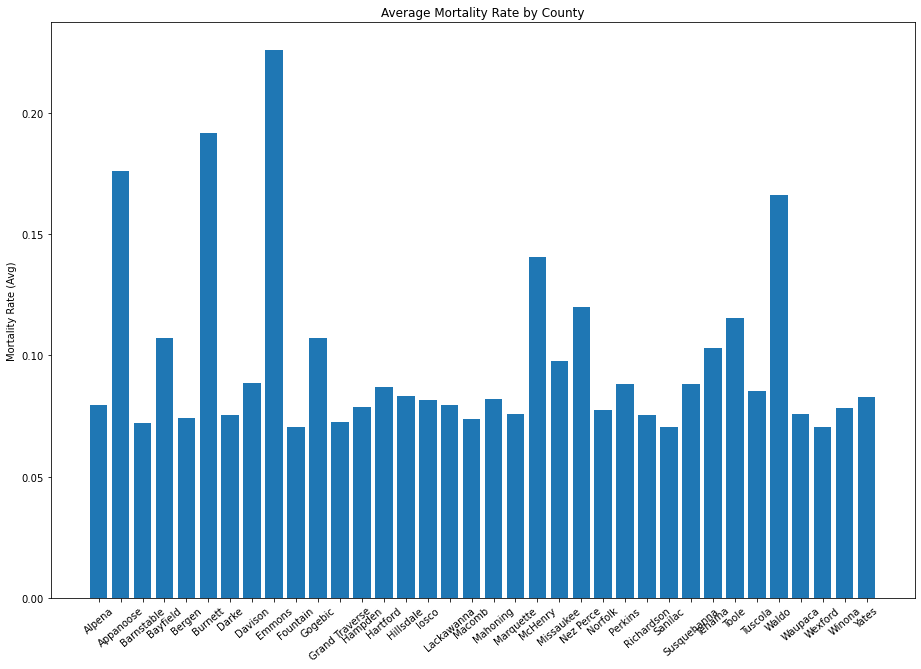

In [26]:
new = dict(df4['mortality'])
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(new.keys(),new.values())
plt.xticks(rotation = 40)
plt.title('Average Mortality Rate by County')
plt.ylabel('Mortality Rate (Avg)')
plt.show()

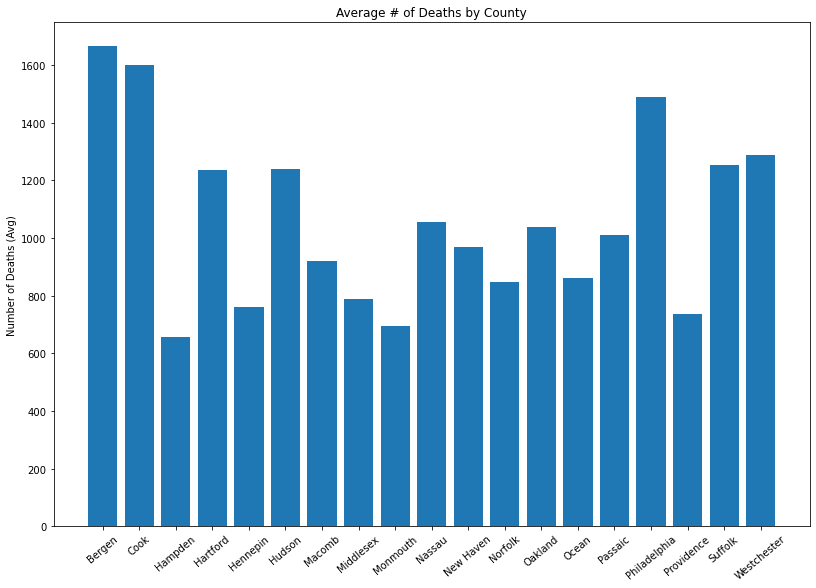

In [27]:
new = dict(df5['deaths'])
fig = plt.figure()
ax = fig.add_axes([0,0,1.75,1.75])
ax.bar(new.keys(),new.values())
plt.xticks(rotation = 40)
plt.title('Average # of Deaths by County')
plt.ylabel('Number of Deaths (Avg)')
plt.show()

In [ ]:
#Make scatterplot of the average number of deaths per county by the average mortality rate to see if the variables relate 
#also a scatterplot of County by mortality rate and cases by mortality rate
#check covid and asthma + covid and air quality

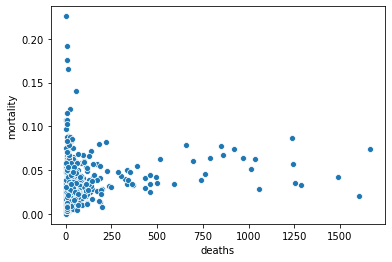

In [28]:
sns.scatterplot(x= df3['deaths'], y = df3['mortality'])

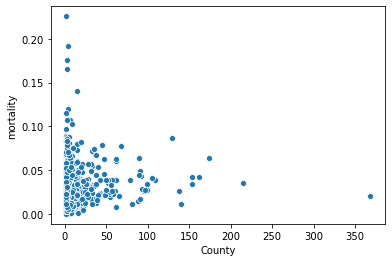

In [30]:
sns.scatterplot(x= df3['County'], y = df3['mortality'])

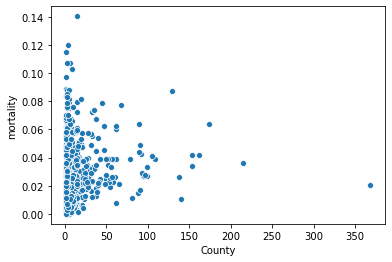

In [32]:
sns.scatterplot(x= low_rate['County'], y = low_rate['mortality'])

In [34]:
df3[df3['County'] == 368]

,fips,cases,deaths,mortality,County
county,,,,,
Cook,18192.67366,51792.073427,1601.574592,0.020656,368.0


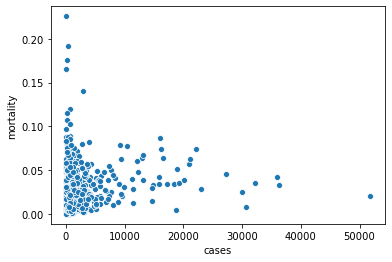

In [35]:
sns.scatterplot(x= df3['cases'], y = df3['mortality'])

In [46]:
asthma = pd.read_csv('500_Cities__Current_asthma_among_adults_aged___18_years.csv')
asthma['state'] = asthma['StateDesc']
asthma['asthma_value_times_count'] = (asthma['Data_Value'] * asthma['PopulationCount'])/100
asthma['asthma_value_times_count']
asthma1 = asthma.groupby(['state']).sum()
asthma_state_count = asthma1['asthma_value_times_count']

In [64]:
covid_asthma = pd.merge(asthma_state_count,Covid_data,
    how="left",                      
    left_on = ['state'],
    right_on = ['state'])
covid_asthma.groupby(['state']).mean()
#covid_asthma[covid_asthma['state']=='Arizona']['mortality']

,asthma_value_times_count,fips,cases,deaths,mortality
state,,,,,
Alabama,3.280474e+05,1067.171342,1867.211443,29.751241,0.021592
Alaska,7.864929e+04,2145.553819,490.181987,2.234146,0.003057
Arizona,1.209882e+06,4013.911551,11827.994978,254.254367,inf
Arkansas,1.422413e+05,5075.195990,965.536025,15.058879,0.017450
California,5.930240e+06,6058.205055,11768.286735,194.662514,inf
Colorado,7.130967e+05,8062.209162,1502.207024,32.809912,0.024151
Connecticut,2.831406e+05,9007.949753,7222.076555,439.738682,0.057198
Delaware,2.559089e+04,10003.002195,4972.563606,132.358045,0.024451
District of C,1.805677e+05,NaN,NaN,NaN,NaN
